In [1]:
# Calcula la exposición al cambio climático para grupos demográficos femeninos

# Importamos librerías
import numpy as np
import pandas as pd
import geopandas as gpd
import geoviews as gv
import holoviews as hv

# Data & Functions

In [2]:
# Parámetros de mapas
gv.extension("matplotlib")
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "colorbar": True, "linewidth": 0.4,
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar_opts": {"orientation": "horizontal"} }
options_l = { "colorbar": True, "linewidth": 0.4, "cmap": "plasma_r", 
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180), "logz": True,
    "colorbar_opts": {"orientation": "horizontal", "format": "{x:,.0f}"} }
options_m = { "bgcolor": "lightgray", "fontscale": 2, "aspect": 2.25 }

def hook_2(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.95*b, w, 0.05*h])
options_m_2 = { "bgcolor": "lightgray", "fontscale": 0.3, "aspect": 2.25 }

# Parámetros de visualización de tablas
pd.options.display.float_format = "{:,.1f}".format

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
# Códigos nacionales
ix  = "ISO_A3"

# Mapa
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

In [4]:
# Funciones a utilizar

# Mejora el formato de las tablas para su uso en documentos.
def display(df, vn, var_i = None, p = False, format = ["{:.1f}"],
    category = "", type = "category", add = False):
    # variables
    # df:       dataframe que contiene los datos
    # vn:       variable principal
    # var_i:    conjunto de variables secundarias, solo si type = "index"
    # p:        indica si la variable es positiva
    # format:   formato a usar, se pasa como un solo datos si
    #           type = "category" y como una
    #           lista por cada columna si type = "index"
    # category: nombre de la categoría, solo si type = "category"
    # type:     tipo de tabla a crear
    #           "index":    Resumen de variables
    #           "category": Una variable principal
    # add:      indica si sumar (True) o promediar (False) cada columna,
    #           se pasa como un solo datos si type = "category" y como una
    #           lista por cada columna si type = "index"
    #
    # regresa
    # disp:     Objeto Display de Pandas o un Dataframe
    #           de pandas basado en la tabla de entrada

    # Escogemos los 5 países más altos y otros más para formar la tabla
    # Resumen de variables
    if   type == "index":
        disp = df.loc[ df[vn].notnull(),
            ["name", vn] + var_i ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    # Una variable principal
    elif type == "category":
        disp = df.loc[ df[vn].notnull(), ["name", vn] ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    c_list = list( disp[ ["name", vn]
        ].sort_values(vn, ascending = p).head(5)["name"].values )
    print(f"Most vulnerable countries: {', '.join(c_list)}")

    # Renombramos columnas
    # Resumen de variables
    if   type == "index":
        cols = ["Name", vn] + var_i
    # Una variable principal
    elif type == "category":
        cols = [ "Name", f"{category}" ]
    disp.columns = cols

    # Categorías geopolíticas y geográficas
    cats = [ "", "", "", "", "", "", "SIDS", "LDC", "LLDC",
        "Asia", "Europe", "Africa", "Oceania", "Americas" ]
    # Iteramos para cada categoría geopolítica
    for r, cat in enumerate(cats[:9]):
        if r in range(0, 6): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "index":
                # Sumamos o promediamos según sea el caso
                for i, c in enumerate(cols[1:]):
                    if add[i]: disp.iloc[r, i+1] = df.loc[ df[cat], c ].sum()
                    else:      disp.iloc[r, i+1] = df.loc[ df[cat], c ].mean()
            # Una variable principal
            elif type == "category":
                # Sumamos la columna
                if add: disp.iloc[r, 1] = df.loc[df[cat], vn].sum()
                # Promediamos la columna
                else  : disp.iloc[r, 1] = df.loc[df[cat], vn].mean()
            c_list = list( df.loc[df[cat], ["name", vn]
                ].sort_values( vn, ascending = p
                ).head(5)["name"].values )
            print(f"Most vulnerable {cat}: {', '.join(c_list)}")

    # Iteramos para cada categoría geográfica
    for r, cat in enumerate(cats):
        if r in range(0, 9): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "index":
                # Sumamos o promediamos según sea el caso
                for i, c in enumerate(cols[1:]):
                    if add[i]:
                        disp.iloc[r, i+1] = df.loc[
                            df["region"] == cat, c ].sum()
                    else     :
                        disp.iloc[r, i+1] = df.loc[
                            df["region"] == cat, c ].mean()
            # Una variable principal
            elif type == "category":
                # Sumamos la columna
                if add:
                    disp.iloc[r, 1] = df.loc[df["region"] == cat, vn].sum()
                # Promediamos la columna
                else  :
                    disp.iloc[r, 1] = df.loc[df["region"] == cat, vn].mean()

    # Total mundial
    cat = "World"
    r = 14
    disp.iloc[r, 0] = cat
    # Resumen de variables
    if   type == "index":
        # Sumamos o promediamos según sea el caso
        for i, c in enumerate(cols[1:]):
            if add[i]: disp.iloc[r, i+1] = df[c].sum()
            else     : disp.iloc[r, i+1] = df[c].mean()
    # Una variable principal
    elif type == "category":
        # Sumamos la columna
        if add: disp.iloc[r, 1] = df[vn].sum()
        # Promediamos la columna
        else  : disp.iloc[r, 1] = df[vn].mean()

    # Damos formato
    # Resumen de variables
    if   type == "index":
        # Pasamos la tabla sin formato
        disp = disp.style.format( dict(zip(cols[1:], format)) )
        # Una variable principal
    elif type == "category":
        disp = disp.style.format( { cols[1]: format } )

    # Regresamos la tabla
    return disp

# Demographic grouping

In [5]:
# Códigos nacionales
ix  = "ISO_A3"

# Grupos de información
s_f = ["1995_2014", "2040_2059_SSP245"]
g_f = ["f", "m"]
g_n = ["Female", "Male"]
a_f = [0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
a_n = ( ["0-12 months"] + [f"{x} years" for x in [ "1-5",  "5-10", "10-15",
  "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55",
  "55-60", "60-65", "65-70", "70-75", "75-80", "more than 80" ] ] )
var_tot  = "Extreme climate"
names     = "age_sex_structures"

# Escenario a calcular
s = 1

# Carpetas y archivos
file_n  = f"{names}_{s_f[s]}.csv"
df_iso = pd.read_csv( f"../share/Indexes/{file_n}", index_col = ix )

# Creamos un nuevo Dataframe
df = df_iso[["name", "ISO_N3", "region", "sub-region", "OECD", "EU27",
        "BRICS+", "BRICS", "LDC", "SIDS", "LLDC"]].copy()

# Iteramos para cada género
var_g  = [[], []]
name_g = [[], []]
perc_g = [[], []]
for g in range(len(g_f)):

    # Creamos variables por grupos demográficos y los calculamos.
    var_n   = [ f"{g_n[g]} population, {x} old" for x in a_n ]
    name_n  = [ f" affected {x.lower()}" for x in var_n ]
    name_t  = [ f"{var_tot}{x}" for x in name_n ]
    name_tp = [ f"% {x}" for x in name_t ]

    var_0  = var_n[0]
    name_0 = name_t[0]
    perc_0 = name_tp[0]
    var_g[ g].append(var_0 )
    name_g[g].append(name_0)
    perc_g[g].append(perc_0)
    var_5  =   f"{g_n[g]} population, 0-5 years old"
    name_5 = ( f"Extreme climate affected {g_n[g].lower()} "
        + "population, 0-5 years old" )
    perc_5 =   f"% {name_5}"
    var_g[ g].append(var_5 )
    name_g[g].append(name_5)
    perc_g[g].append(perc_5)
    var_65  =   f"{g_n[g]} population, more than 65 years old"
    name_65 = ( f"Extreme climate affected {g_n[g].lower()} "
        + "population, more than 65 years old" )
    perc_65 =   f"% {name_65}"
    var_g[ g].append(var_65 )
    name_g[g].append(name_65)
    perc_g[g].append(perc_65)
    var_total  =   f"{g_n[g]} population"
    name_total = ( f"Extreme climate affected {g_n[g].lower()} population" )
    perc_total =   f"% {name_total}"
    var_g[ g].append(var_total )
    name_g[g].append(name_total)
    perc_g[g].append(perc_total)

    df[var_0 ] = df_iso[ var_n[0:1] ].sum(axis = 1)
    df[name_0] = df_iso[ name_t[0:1] ].sum(axis = 1)
    df[perc_0] = 100 * df[name_0] / df[var_0]
    df[var_5 ] = df_iso[ var_n[0:2] ].sum(axis = 1)
    df[name_5] = df_iso[ name_t[0:2] ].sum(axis = 1)
    df[perc_5] = 100 * df[name_5] / df[var_5]
    df[var_65 ] = df_iso[ var_n[-4:] ].sum(axis = 1)
    df[name_65] = df_iso[ name_t[-4:] ].sum(axis = 1)
    df[perc_65] = 100 * df[name_65] / df[var_65]
    df[var_total ] = df_iso[ var_n ].sum(axis = 1)
    df[name_total] = df_iso[ name_t ].sum(axis = 1)
    df[perc_total] = 100 * df[name_total] / df[var_total]

# Diferencia entre hombres y mujeres
diff_0     = ( "Extreme climate affected % difference "
    + "between female and male population, 0-12 months old" )
diff_5     = ( "Extreme climate affected % difference "
    + "between female and male population, 0-5 years old" )
diff_65    = ( "Extreme climate affected % difference "
    + "between female and male population, more than 65 years old" )
diff_total = ( "Extreme climate affected % difference "
    + "between female and male population" )
diff = [diff_0, diff_5, diff_65, diff_total]
df[diff_0 ] = df[ perc_g[0][0] ] - df[ perc_g[1][0] ]
df[diff_5 ] = df[ perc_g[0][1] ] - df[ perc_g[1][1] ]
df[diff_65] = df[ perc_g[0][2] ] - df[ perc_g[1][2] ]
df[diff_total] = df[ perc_g[0][2] ] - df[ perc_g[1][2] ]

# Infants

Female population, 0-12 months old   67,315,632
Male population, 0-12 months old     71,764,769
Extreme climate affected female population, 0-12 months old   40.3 %
Extreme climate affected male population, 0-12 months old     40.8 %

min: 0.0027794982, max: 8472478.066300001


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected female population, 0-12 months old)
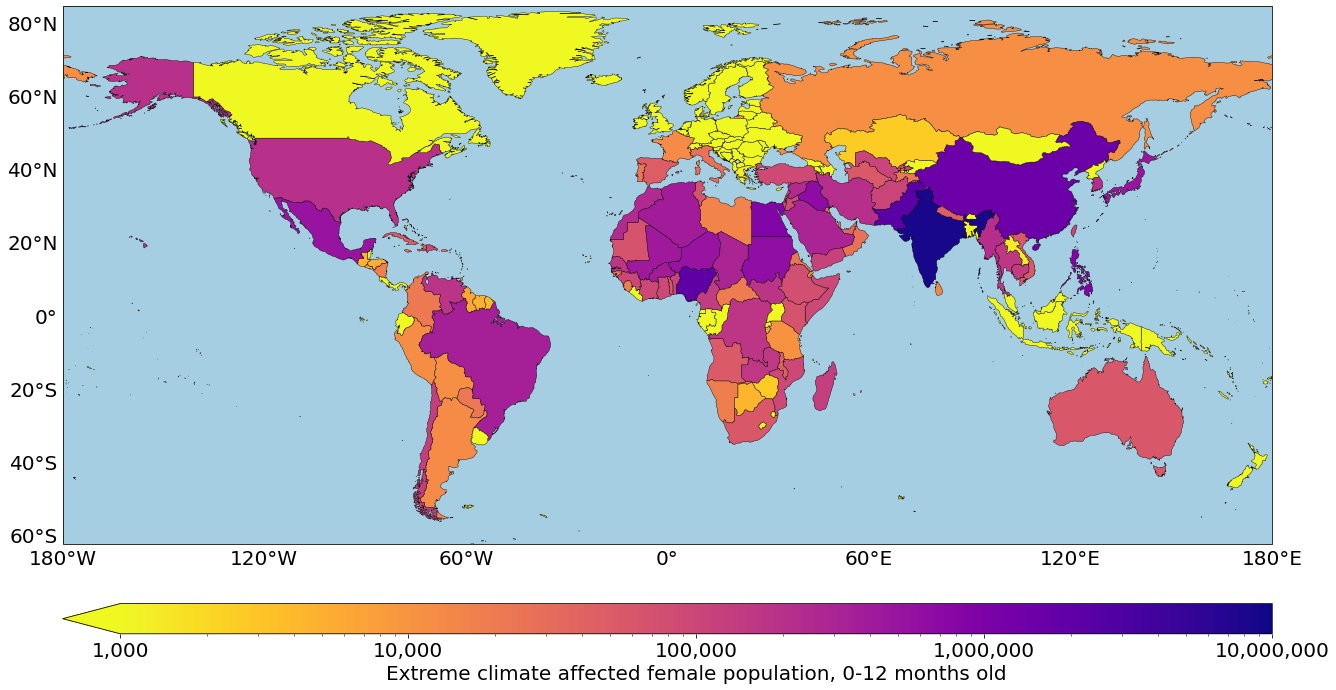

min: 0.0, max: 100.0


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Extreme climate affected female population, 0-12 months old)
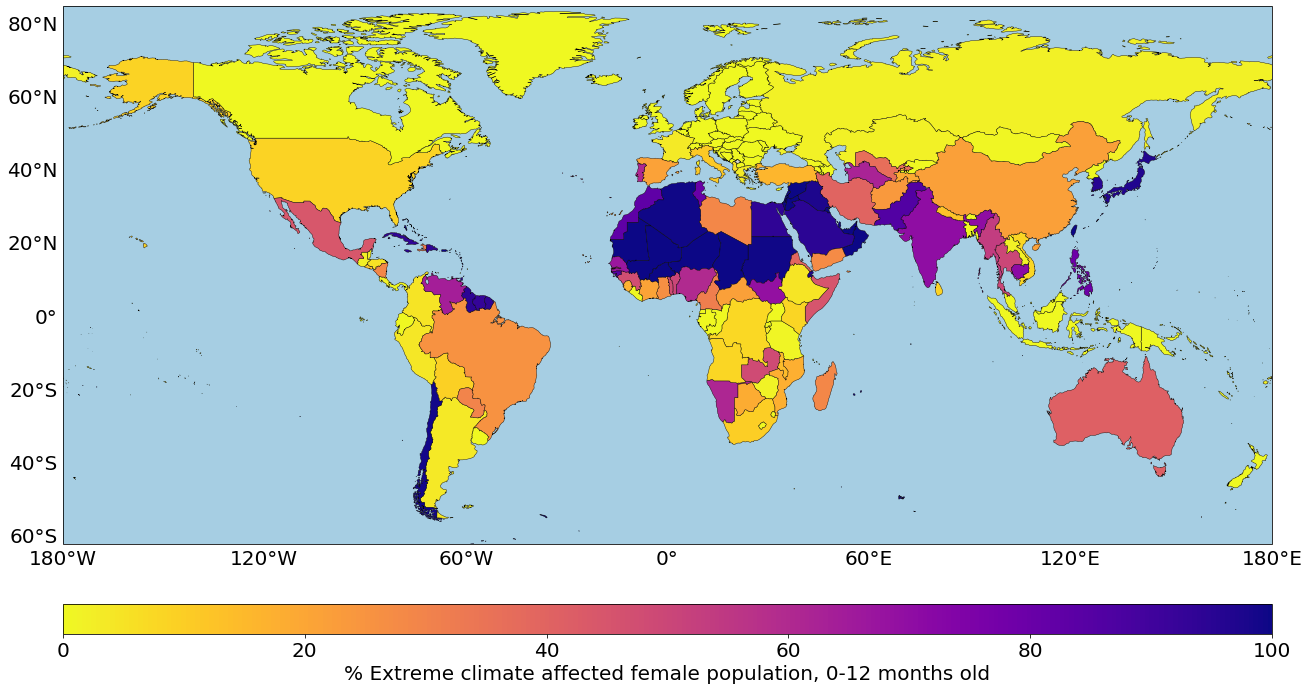

min: -1.4698851667415127, max: 1.438649534740577


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected % difference between female and male population, 0-12 months old)
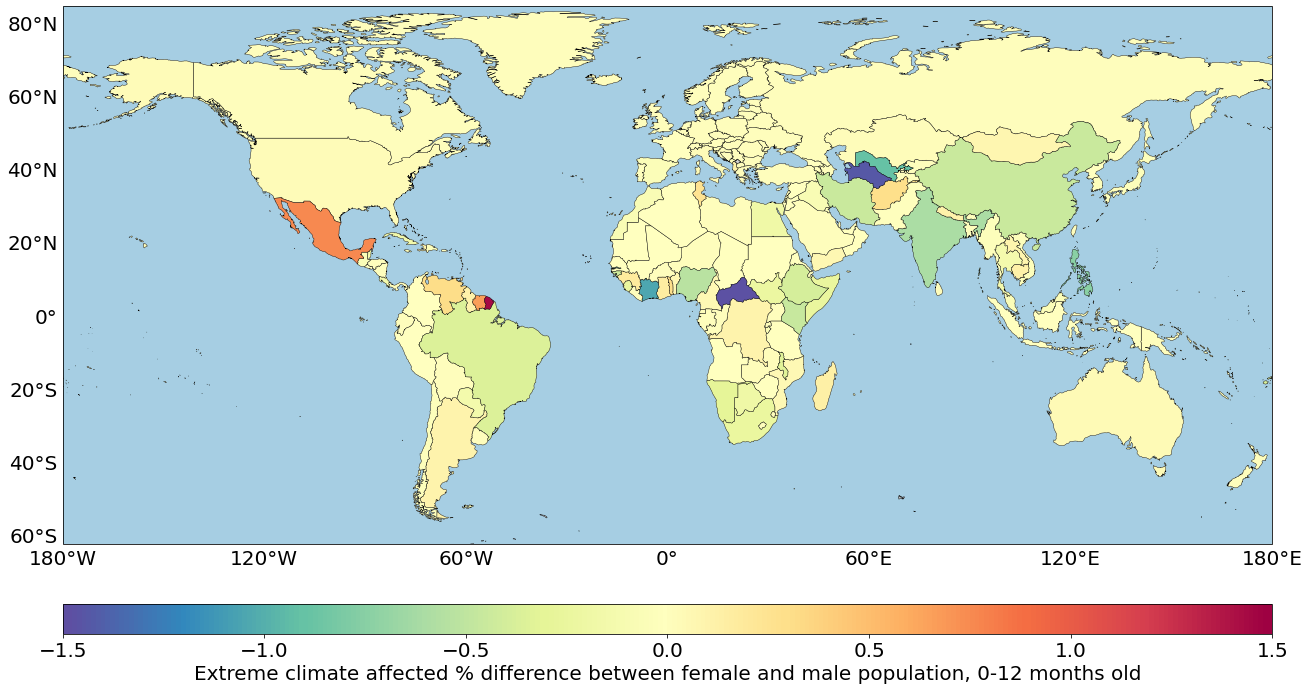

Most vulnerable countries: Bonaire, Sint Eustatius and Saba, French Guiana, Saint Vincent and the Grenadines, Mexico, Suriname
Most vulnerable SIDS: Saint Vincent and the Grenadines, Suriname, Trinidad and Tobago, Guyana, Haiti
Most vulnerable LDC: Afghanistan, Togo, Guinea, Cambodia, Nepal
Most vulnerable LLDC: Afghanistan, Nepal, Lao People's Democratic Republic, Mongolia, Kazakhstan


In [6]:
# Infants, 0-12 months old

 #calculamos la variable y el porcentaje
i = 0
a = df[ [var_g[0][i], var_g[1][i]] ].sum()
b = ( 100 * df[ [name_g[0][i], name_g[1][i]] ].sum()
    / df[ [var_g[0][i], var_g[1][i]] ].sum().values )
# Población
pd.options.display.float_format = '{:,.0f}'.format
print(a.to_string())
# Porcentaje
pd.options.display.float_format = '{:,.1f} %'.format
print(b.to_string())
print()

# Mapas
# Mujeres afectadas
vn = name_g[0][i]
borders[vn] = df[vn].replace(0, 1)
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 1000
max = 1e7
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( **options_l )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Porcentaje de mujeres afectadas
vn = perc_g[0][i]
borders[vn] = df[vn].where( df[vn] < 100, 100)
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 100
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Diferencia de porcentaje entre mujeres y hombre
vn = diff[i]
borders[vn] = df[vn]
# Quitamos Cabo Verde por motivos de visualización
borders.loc["CPV", vn] = np.nan
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -1.5
max = 1.5
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Resumen por países, diferencia entre hombres y mujeres
disp = display(df, diff[i], var_i = [ perc_g[0][i], name_g[0][i] ],
    p = False, type = "index", add = [False, False, True],
    format = ["{:,.2f}", "{:,.1f}", "{:,.0f}"])
disp

In [7]:
# Países con 100% de afectación
a = df.loc[ df[perc_g[0][i]]>=100, ["name", name_g[0][i]] ].sort_values(
    name_g[0][i], ascending = False ).dropna(
    ).head(10).rename( columns = {"name": "Name"} )
a.style.format( {perc_g[0][i]: "{:,.1f}", name_g[0][i]: "{:,.0f}"} )

In [8]:
# Resumen por países, población más afectada
disp = display(df, name_g[0][i], var_i = [ perc_g[0][i] ], p = False,
    type = "index", add = [True, False ], format = ["{:,.0f}", "{:,.1f}"])
disp

Most vulnerable countries: India, Pakistan, Nigeria, China, Philippines
Most vulnerable SIDS: Dominican Republic, Cuba, Haiti, Guinea-Bissau, Jamaica
Most vulnerable LDC: Sudan, Niger, Mali, Burkina Faso, Chad
Most vulnerable LLDC: Niger, Mali, Burkina Faso, Chad, South Sudan


# Young children

Female population, 0-5 years old   334,905,736
Male population, 0-5 years old     358,083,656
Extreme climate affected female population, 0-5 years old   40.1 %
Extreme climate affected male population, 0-5 years old     40.6 %

min: 0.014197624700000001, max: 40879770.066300005


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected female population, 0-5 years old)
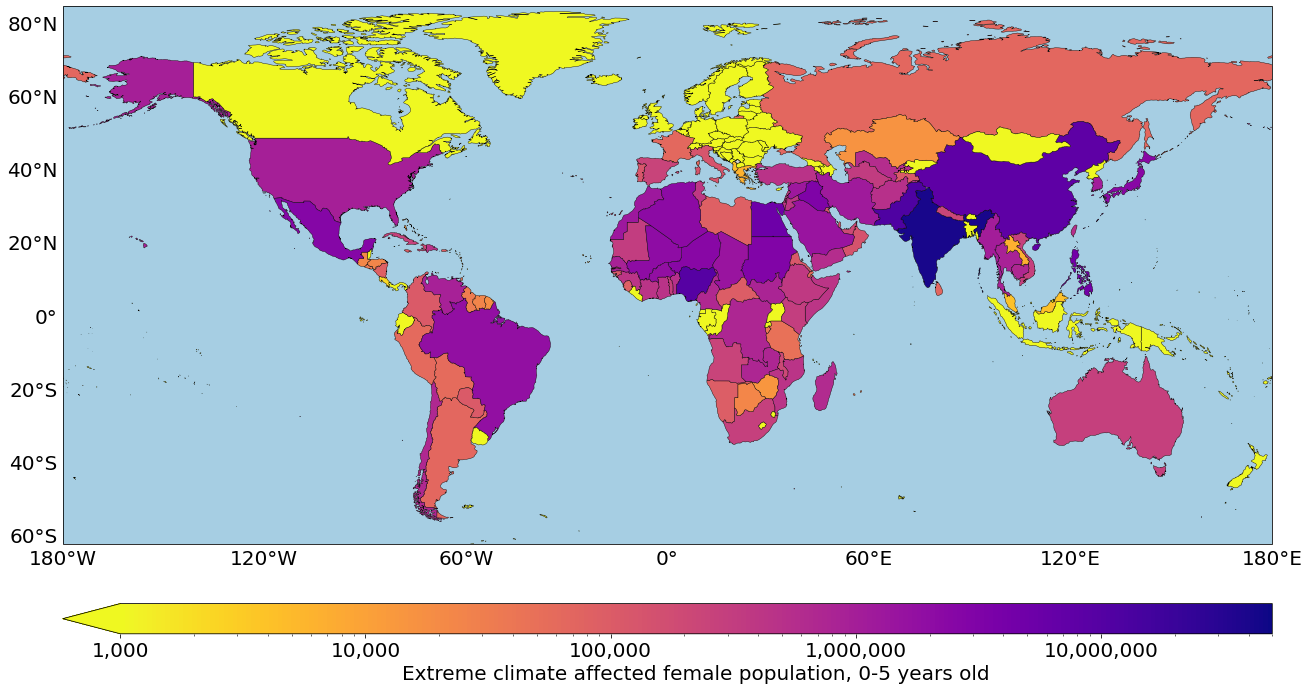

min: 0.0, max: 100.0


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Extreme climate affected female population, 0-5 years old)
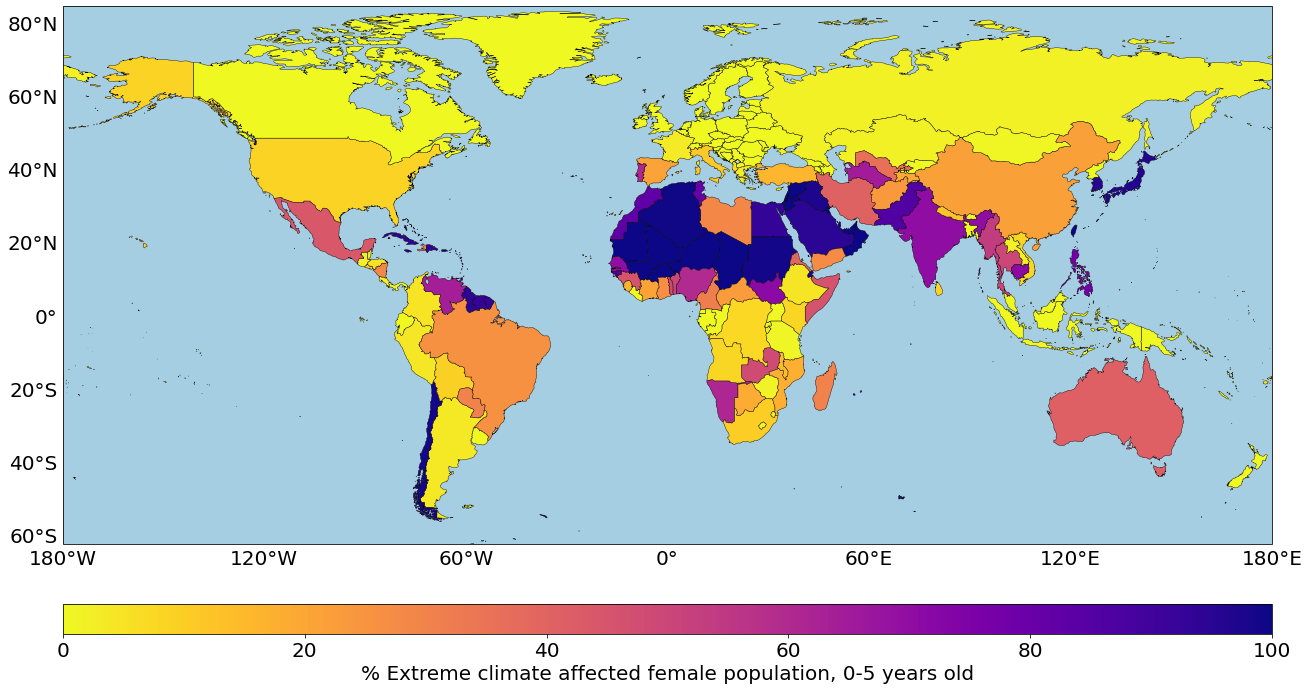

min: -1.5785223859754076, max: 1.2163444816657005


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected % difference between female and male population, 0-5 years old)
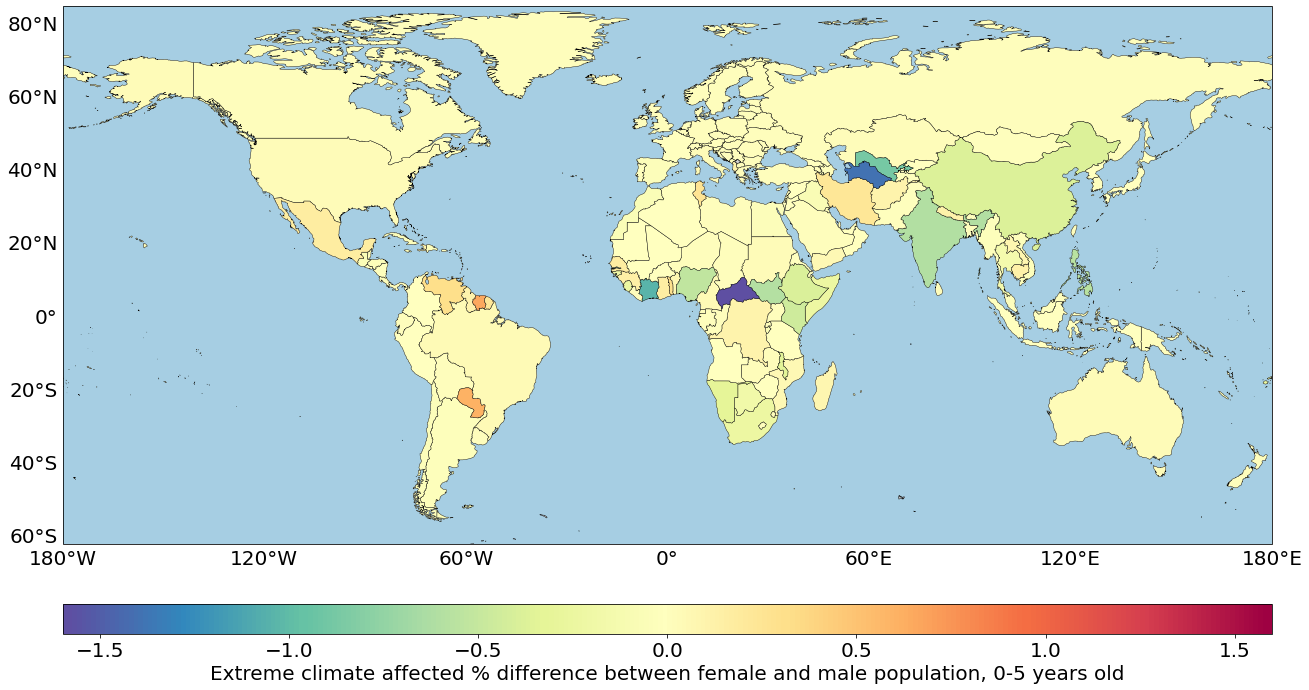

Most vulnerable countries: Bonaire, Sint Eustatius and Saba, Saint Vincent and the Grenadines, Suriname, Paraguay, Venezuela (Bolivarian Republic of)
Most vulnerable SIDS: Saint Vincent and the Grenadines, Suriname, Trinidad and Tobago, Guyana, Haiti
Most vulnerable LDC: Togo, Senegal, Guinea, Cambodia, Nepal
Most vulnerable LLDC: Paraguay, Nepal, Afghanistan, Lao People's Democratic Republic, Kazakhstan


In [9]:
# Young children, less than 5 years old

# Calculamos la variable y el porcentaje
i = 1
a = df[ [var_g[0][i], var_g[1][i]] ].sum()
b = ( 100 * df[ [name_g[0][i], name_g[1][i]] ].sum()
    / df[ [var_g[0][i], var_g[1][i]] ].sum().values )
# Población
pd.options.display.float_format = '{:,.0f}'.format
print(a.to_string())
# Porcentaje
pd.options.display.float_format = '{:,.1f} %'.format
print(b.to_string())
print()

# Mapas
# Mujeres afectadas
n_series = "female"
vn = name_g[0][i]
borders[vn] = df[vn].replace(0, 1)
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 1000
max = 5e7
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( **options_l )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Porcentaje de mujeres afectadas
n_series = "female"
vn = perc_g[0][i]
borders[vn] = df[vn].where( df[vn] < 100, 100)
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 100
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Diferencia de porcentaje entre mujeres y hombre
n_series = "female"
vn = diff[i]
borders[vn] = df[vn]
# Quitamos Cabo Verde por motivos de visualización
borders.loc["CPV", vn] = np.nan
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -1.6
max = 1.6
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Resumen por países, diferencia entre hombres y mujeres
disp = display(df, diff[i], var_i = [ perc_g[0][i], name_g[0][i] ],
    p = False, type = "index", add = [False, False, True],
    format = ["{:,.2f}", "{:,.1f}", "{:,.0f}"])
disp

In [10]:
# Países con 100% de afectación
a = df.loc[ df[perc_g[0][i]]>=100, ["name", name_g[0][i]] ].sort_values(
    name_g[0][i], ascending = False ).dropna(
    ).head(10).rename( columns = {"name": "Name"} )
a.style.format( {perc_g[0][i]: "{:,.1f}", name_g[0][i]: "{:,.0f}"} )

In [11]:
# Resumen por países, población más afectada
disp = display(df, name_g[0][i], var_i = [ perc_g[0][i] ], p = False,
    type = "index", add = [True, False ], format = ["{:,.0f}", "{:,.1f}"])
disp

Most vulnerable countries: India, Pakistan, Nigeria, China, Egypt
Most vulnerable SIDS: Dominican Republic, Cuba, Haiti, Guinea-Bissau, Jamaica
Most vulnerable LDC: Sudan, Niger, Mali, Burkina Faso, Chad
Most vulnerable LLDC: Niger, Mali, Burkina Faso, Chad, South Sudan


# Elderly

Female population, more than 65 years old   403,067,422
Male population, more than 65 years old     331,641,062
Extreme climate affected female population, more than 65 years old   30.8 %
Extreme climate affected male population, more than 65 years old     32.3 %

min: 0.0119466224, max: 32532511.5


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected female population, more than 65 years old)
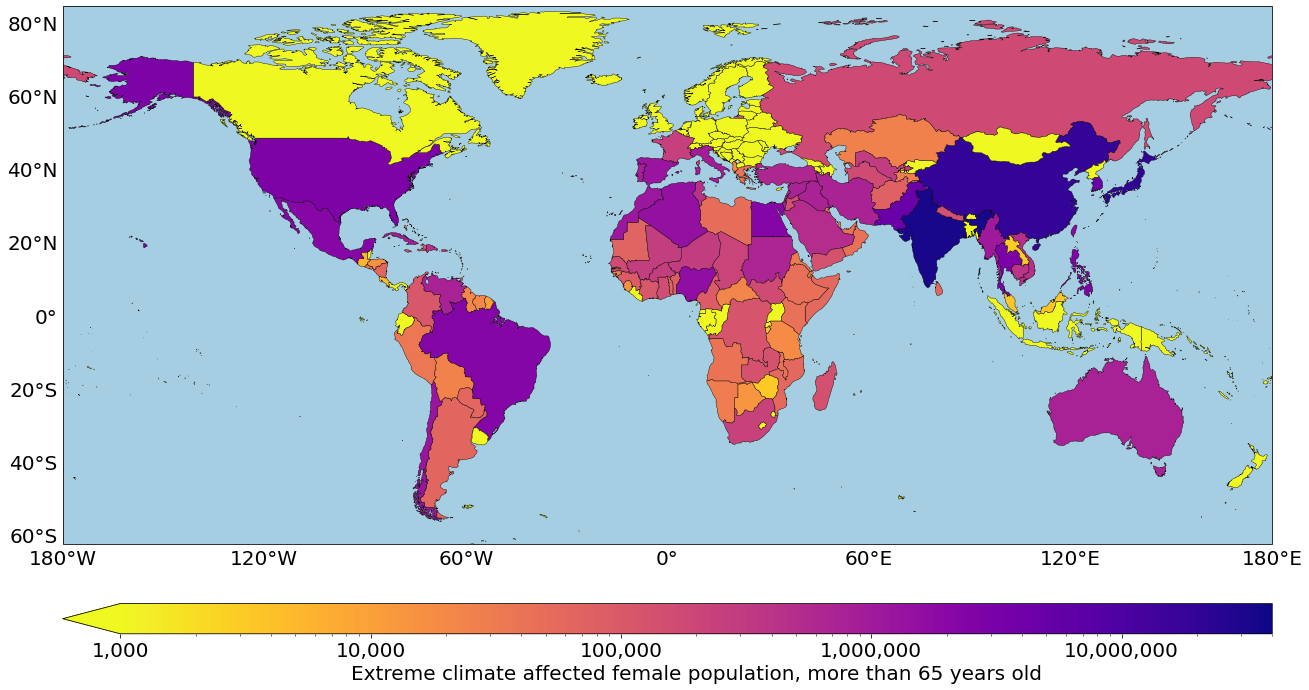

min: 0.0, max: 100.0


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Extreme climate affected female population, more than 65 years old)
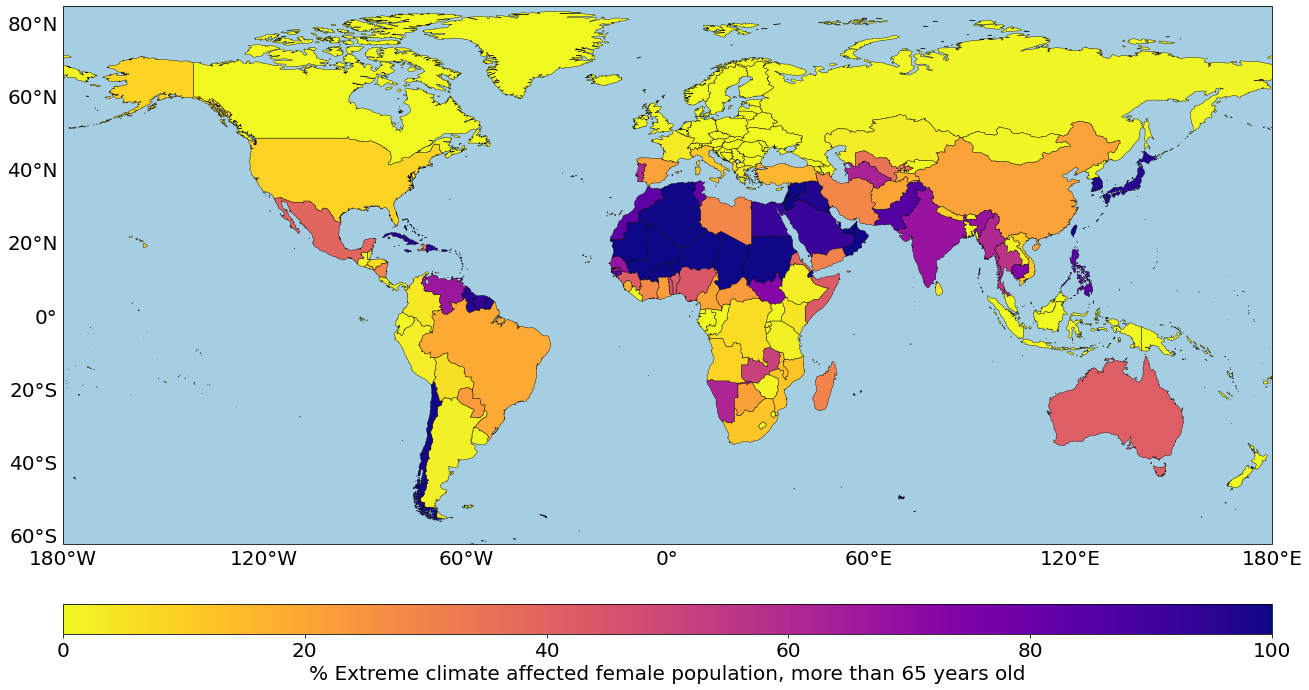

min: -7.888725941592583, max: 5.220216870628192


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected % difference between female and male population, more than 65 years old)
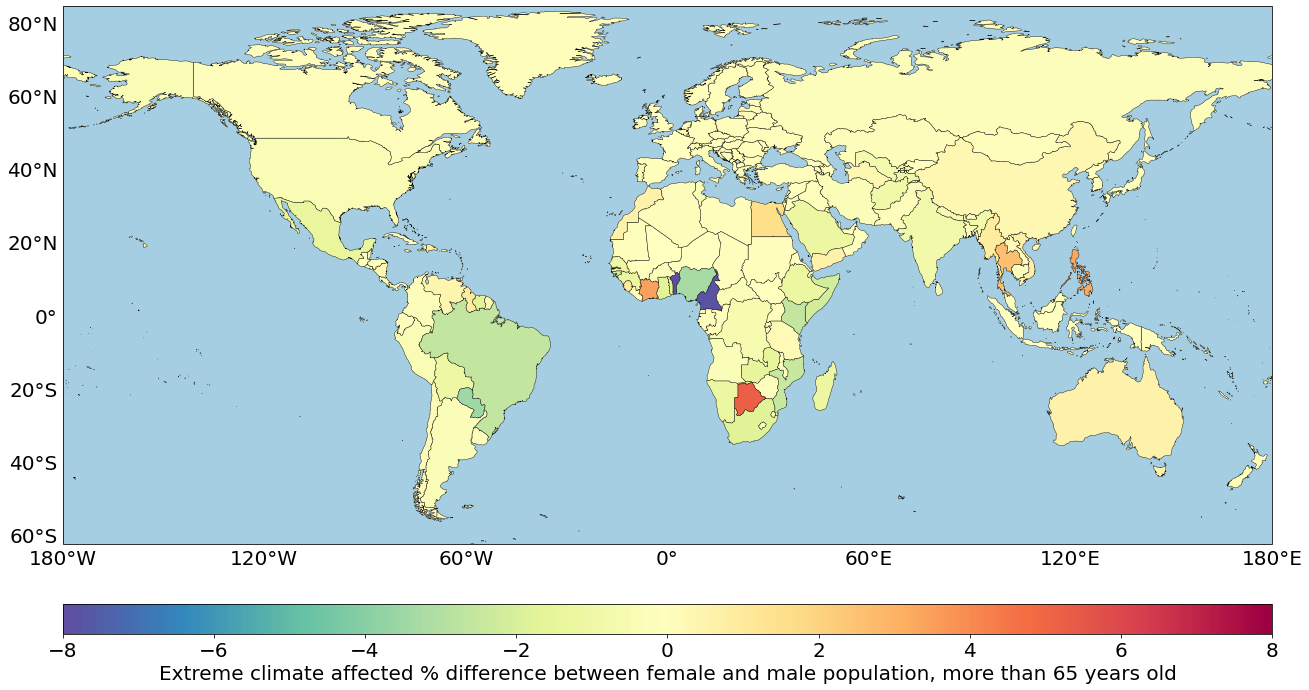

Most vulnerable countries: Botswana, Gambia, Côte d'Ivoire, Philippines, Thailand
Most vulnerable SIDS: Saint Vincent and the Grenadines, Dominican Republic, Guyana, Jamaica, Trinidad and Tobago
Most vulnerable LDC: Gambia, Sierra Leone, Myanmar, Yemen, Tanzania, United Republic of
Most vulnerable LLDC: Botswana, Turkmenistan, Kazakhstan, Lao People's Democratic Republic, Burkina Faso


In [12]:
# Elderly women, more than 65 years old

# Calculamos la variable y el porcentaje
i = 2
a = df[ [var_g[0][i], var_g[1][i]] ].sum()
b = ( 100 * df[ [name_g[0][i], name_g[1][i]] ].sum()
    / df[ [var_g[0][i], var_g[1][i]] ].sum().values )
# Población
pd.options.display.float_format = '{:,.0f}'.format
print(a.to_string())
# Porcentaje
pd.options.display.float_format = '{:,.1f} %'.format
print(b.to_string())
print()

# Mapas
# Mujeres afectadas
n_series = "female"
vn = name_g[0][i]
borders[vn] = df[vn].replace(0, 1)
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 1000
max = 4e7
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( **options_l )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Porcentaje de mujeres afectadas
n_series = "female"
vn = perc_g[0][i]
borders[vn] = df[vn].where( df[vn] < 100, 100)
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 100
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Diferencia de porcentaje entre mujeres y hombre
n_series = "female"
vn = diff[i]
borders[vn] = df[vn]
# Quitamos Cabo Verde por motivos de visualización
borders.loc["CPV", vn] = np.nan
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -8
max = 8
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Resumen por país, diferrencia entre hombres y mujeres
disp = display(df, diff[i], var_i = [ perc_g[0][i], name_g[0][i] ],
    p = False, type = "index", add = [False, False, True],
    format = ["{:,.2f}", "{:,.1f}", "{:,.0f}"])
disp

In [13]:
# Países con 100% de afectación
a = df.loc[ df[perc_g[0][i]]>=100, ["name", name_g[0][i]] ].sort_values(
    name_g[0][i], ascending = False ).dropna(
    ).head(10).rename( columns = {"name": "Name"} )
a.style.format( {perc_g[0][i]: "{:,.1f}", name_g[0][i]: "{:,.0f}"} )

In [14]:
# Resumen por país, población más afectada
disp = display(df, name_g[0][i], var_i = [ perc_g[0][i] ], p = False,
    type = "index", add = [True, False ], format = ["{:,.0f}", "{:,.1f}"])
disp

Most vulnerable countries: India, Japan, China, Korea, Republic of, Pakistan
Most vulnerable SIDS: Cuba, Dominican Republic, Puerto Rico, Jamaica, Haiti
Most vulnerable LDC: Myanmar, Sudan, Cambodia, Niger, Burkina Faso
Most vulnerable LLDC: Uzbekistan, Niger, Burkina Faso, Mali, Chad


# Total

Female population   3,951,443,640
Male population     3,995,769,184
Extreme climate affected female population   36.3 %
Extreme climate affected male population     37.6 %

min: 0.16160237249999998, max: 461800003.56630003


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected female population)
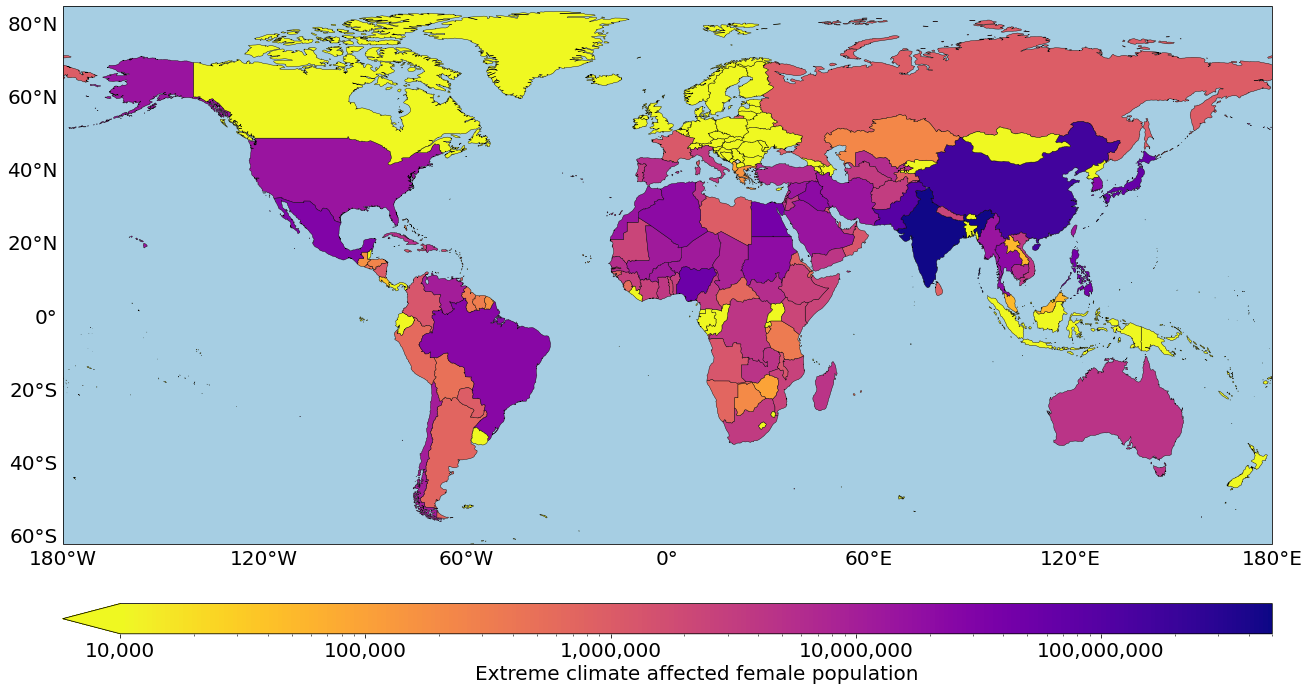

min: 0.0, max: 100.0


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Extreme climate affected female population)
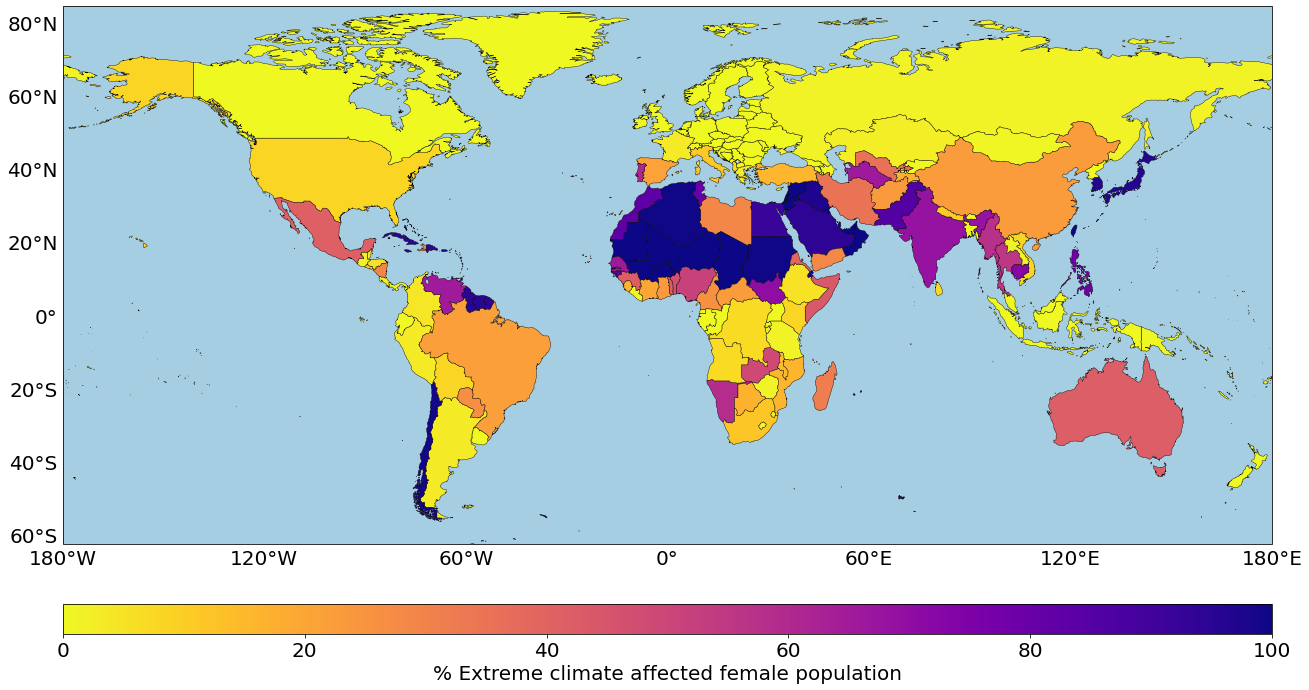

min: -7.888725941592583, max: 5.220216870628192


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected % difference between female and male population)
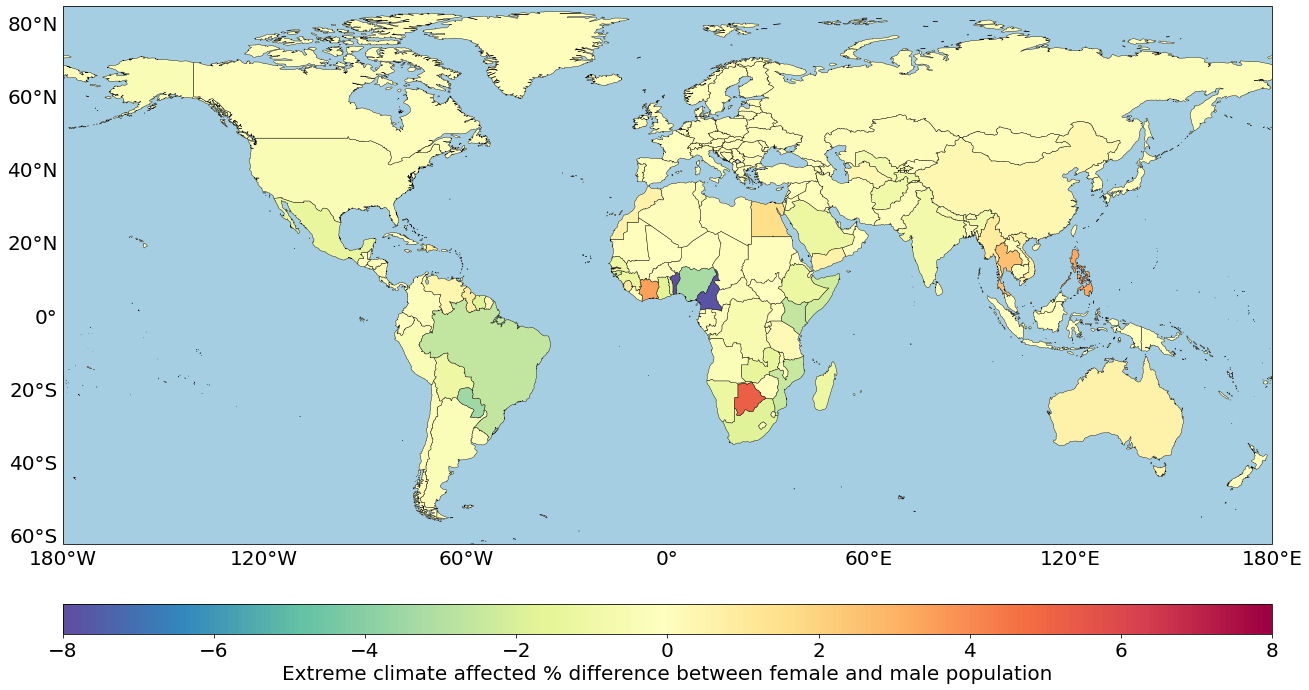

Most vulnerable countries: Botswana, Gambia, Côte d'Ivoire, Philippines, Thailand
Most vulnerable SIDS: Saint Vincent and the Grenadines, Dominican Republic, Guyana, Jamaica, Trinidad and Tobago
Most vulnerable LDC: Gambia, Sierra Leone, Myanmar, Yemen, Tanzania, United Republic of
Most vulnerable LLDC: Botswana, Turkmenistan, Kazakhstan, Lao People's Democratic Republic, Burkina Faso


In [15]:
# All women

# Calculamos la variable y el porcentaje
i = 3 
a = df[ [var_g[0][i], var_g[1][i]] ].sum()
b = ( 100 * df[ [name_g[0][i], name_g[1][i]] ].sum()
    / df[ [var_g[0][i], var_g[1][i]] ].sum().values )
# Población
pd.options.display.float_format = '{:,.0f}'.format
print(a.to_string())
# Porcentaje
pd.options.display.float_format = '{:,.1f} %'.format
print(b.to_string())
print()

# Mapas
# Mujeres afectadas
n_series = "female"
vn = name_g[0][i]
borders[vn] = df[vn].replace(0, 1)
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 10000
max = 5e8
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( **options_l )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Porcentaje de mujeres afectadas
n_series = "female"
vn = perc_g[0][i]
borders[vn] = df[vn].where( df[vn] < 100, 100)
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 100
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Diferencia de porcentaje entre mujeres y hombre
n_series = "female"
vn = diff[i]
borders[vn] = df[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -8
max = 8
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Resumen por país, diferencia entre hombres y mujeres
disp = display(df, diff[i], var_i = [ perc_g[0][i], name_g[0][i] ],
    p = False, type = "index", add = [False, False, True],
    format = ["{:,.2f}", "{:,.1f}", "{:,.0f}"])
disp

In [16]:
# Resumen estadístico de la diferencia entre hombres y mujeres
pd.options.display.float_format = '{:,.2f}'.format
df[diff].describe().drop("count")

Extreme climate affected % difference between female and male population, 0-12 months old  \
mean                                              -0.04                                           
std                                                0.37                                           
min                                               -3.88                                           
25%                                               -0.00                                           
50%                                                0.00                                           
75%                                                0.00                                           
max                                                1.49                                           

      Extreme climate affected % difference between female and male population, 0-5 years old  \
mean                                              -0.04                                         
std                                                0.35                                         
min                                               -3.88                                         
25%                                               -0.00                                         
50%                                                0.00                                         
75%                                                0.00                                         
max                                                1.49                                         

      Extreme climate affected % difference between female and male population, more than 65 years old  \
mean                                              -0.15                                                  
std                                                1.14                                                  
min                                               -7.89                                                  
25%                                               -0.01                                                  
50%                                                0.00                                                  
75%                                                0.00                                                  
max                                                5.22                                                  

      Extreme climate affected % difference between female and male population  
mean                                              -0.15                         
std                                                1.14                         
min                                               -7.89                         
25%                                               -0.01                         
50%                                                0.00                         
75%                                                0.00                         
max                                                5.22

In [17]:
# Países con 100% de afectación
a = df.loc[ df[perc_g[0][i]]>=100, ["name", name_g[0][i]] ].sort_values(
    name_g[0][i], ascending = False ).dropna(
    ).head(10).rename( columns = {"name": "Name"} )
a.style.format( {perc_g[0][i]: "{:,.1f}", name_g[0][i]: "{:,.0f}"} )

In [18]:
# Resumen por país, población más afectada
disp = display(df, name_g[0][i], var_i = [ perc_g[0][i] ], p = False,
    type = "index", add = [True, False ], format = ["{:,.0f}", "{:,.1f}"])
disp

Most vulnerable countries: India, China, Pakistan, Japan, Nigeria
Most vulnerable SIDS: Dominican Republic, Cuba, Haiti, Puerto Rico, Jamaica
Most vulnerable LDC: Sudan, Myanmar, Niger, Burkina Faso, Mali
Most vulnerable LLDC: Niger, Burkina Faso, Mali, Chad, Uzbekistan


In [19]:
# Resumen de grupos demográficos
disp = display( df, name_g[0][-1], var_i = [perc_g[0][-1]] + name_g[0][:-1],
    p = False, type = "index", add = [True, False, True, True, True],
    format = ["{:,.0f}", "{:,.1f}", "{:,.0f}", "{:,.0f}", "{:,.0f}"] )
disp

Most vulnerable countries: India, China, Pakistan, Japan, Nigeria
Most vulnerable SIDS: Dominican Republic, Cuba, Haiti, Puerto Rico, Jamaica
Most vulnerable LDC: Sudan, Myanmar, Niger, Burkina Faso, Mali
Most vulnerable LLDC: Niger, Burkina Faso, Mali, Chad, Uzbekistan


# Subnational

In [20]:
pd.read_csv( f"../results/{file_n}", index_col = ix )

name  ISO_N3   region          sub-region   OECD   EU27  \
ISO_A3                                                                         
AFG           Afghanistan       4     Asia       Southern Asia  False  False   
ALA         Åland Islands     248   Europe     Northern Europe  False  False   
ALB               Albania       8   Europe     Southern Europe  False  False   
DZA               Algeria      12   Africa     Northern Africa  False  False   
ASM        American Samoa      16  Oceania           Polynesia  False  False   
...                   ...     ...      ...                 ...    ...    ...   
WLF     Wallis and Futuna     876  Oceania           Polynesia  False  False   
ESH        Western Sahara     732   Africa     Northern Africa  False  False   
YEM                 Yemen     887     Asia        Western Asia  False  False   
ZMB                Zambia     894   Africa  Sub-Saharan Africa  False  False   
ZWE              Zimbabwe     716   Africa  Sub-Saharan Africa  False  False   

        BRICS+  BRICS    LDC   SIDS  ...  \
ISO_A3                               ...   
AFG      False  False   True  False  ...   
ALA      False  False  False  False  ...   
ALB      False  False  False  False  ...   
DZA      False  False  False  False  ...   
ASM      False  False  False   True  ...   
...        ...    ...    ...    ...  ...   
WLF      False  False  False  False  ...   
ESH      False  False  False  False  ...   
YEM      False  False   True  False  ...   
ZMB      False  False   True  False  ...   
ZWE      False  False  False  False  ...   

        % Extreme rainfall & drought affected female population, 0-12 months old  \
ISO_A3                                                                             
AFG                                                   NaN                          
ALA                                                   NaN                          
ALB                                                   NaN                          
DZA                                                   NaN                          
ASM                                                   NaN                          
...                                                   ...                          
WLF                                                   NaN                          
ESH                                                   NaN                          
YEM                                                   NaN                          
ZMB                                                   NaN                          
ZWE                                                   NaN                          

        % Extreme rainfall & hurricanes affected female population, 0-12 months old  \
ISO_A3                                                                                
AFG                                                   NaN                             
ALA                                                   NaN                             
ALB                                                   NaN                             
DZA                                                   NaN                             
ASM                                                   NaN                             
...                                                   ...                             
WLF                                                   NaN                             
ESH                                                   NaN                             
YEM                                                   NaN                             
ZMB                                                   NaN                             
ZWE                                                   NaN                             

        % Extreme heat & drought affected female population, 0-12 months old  \
ISO_A3                                                                         
AFG                   

In [21]:
# Códigos subnacionales
ix  = "diss_me"

# Grupos de información
g_f = ["f"]
g_n = ["Female"]
s_f = ["1995_2014", "2040_2059_SSP245"]
#g_f = ["f", "m"]
#g_n = ["Female", "Male"]
a_f = [0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
a_n = ( ["0-12 months"] + [f"{x} years" for x in [ "1-5",  "5-10", "10-15",
  "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55",
  "55-60", "60-65", "65-70", "70-75", "75-80", "more than 80" ] ] )
var_tot  = "Extreme climate"
names     = "age_sex_structures"

# Escenario a calcular
s = 1

# Carpetas y archivos
file_n  = f"{names}_{s_f[s]}_admin_1.csv"

# Datos subnacionales
df = pd.read_csv( f"../results/{file_n}", index_col = ix )

# Mapa subnacional
map_p = ( "../../Bases_de_datos/Mapas/Natural_Earth/"
    + "ne_10m_admin_1_states_provinces_mod" )
subn_m = gpd.read_file(map_p)
subn_m = subn_m.set_index(ix)

# Iteramos para cada género
var_g  = [[], []]
name_g = [[], []]
perc_g = [[], []]
for g in range(len(g_f)):

    # Creamos variables por grupos demográficos y los calculamos.
    var_n   = [ f"{g_n[g]} population, {x} old" for x in a_n ]
    name_n  = [ f" affected {x.lower()}" for x in var_n ]
    name_t  = [ f"{var_tot}{x}" for x in name_n ]
    name_tp = [ f"% {x}" for x in name_t ]

    var_0  = var_n[0]
    name_0 = name_t[0]
    perc_0 = name_tp[0]
    var_g[ g].append(var_0 )
    name_g[g].append(name_0)
    perc_g[g].append(perc_0)
    var_5  =   f"{g_n[g]} population, 0-5 years old"
    name_5 = ( f"Extreme climate affected {g_n[g].lower()} "
        + "population, 0-5 years old" )
    perc_5 =   f"% {name_5}"
    var_g[ g].append(var_5 )
    name_g[g].append(name_5)
    perc_g[g].append(perc_5)
    var_65  =   f"{g_n[g]} population, more than 65 years old"
    name_65 = ( f"Extreme climate affected {g_n[g].lower()} "
        + "population, more than 65 years old" )
    perc_65 =   f"% {name_65}"
    var_g[ g].append(var_65 )
    name_g[g].append(name_65)
    perc_g[g].append(perc_65)
    var_total  =   f"{g_n[g]} population"
    name_total = ( f"Extreme climate affected {g_n[g].lower()} population" )
    perc_total =   f"% {name_total}"
    var_g[ g].append(var_total )
    name_g[g].append(name_total)
    perc_g[g].append(perc_total)

    df[var_0 ] = df[ var_n[0:1] ].sum(axis = 1)
    df[name_0] = df[ name_t[0:1] ].sum(axis = 1)
    df[perc_0] = 100 * df[name_0] / df[var_0]
    df[var_5 ] = df[ var_n[0:2] ].sum(axis = 1)
    df[name_5] = df[ name_t[0:2] ].sum(axis = 1)
    df[perc_5] = 100 * df[name_5] / df[var_5]
    df[var_65 ] = df[ var_n[-4:] ].sum(axis = 1)
    df[name_65] = df[ name_t[-4:] ].sum(axis = 1)
    df[perc_65] = 100 * df[name_65] / df[var_65]
    df[var_total ] = df[ var_n ].sum(axis = 1)
    df[name_total] = df[ name_t ].sum(axis = 1)
    df[perc_total] = 100 * df[name_total] / df[var_total]

# Diferencia entre hombres y mujeres
#diff_0     = ( "Extreme climate affected % difference "
#    + "between female and male population, 0-12 months old" )
#diff_5     = ( "Extreme climate affected % difference "
#    + "between female and male population, 0-5 years old" )
#diff_65    = ( "Extreme climate affected % difference "
#    + "between female and male population, more than 65 years old" )
#diff_total = ( "Extreme climate affected % difference "
#    + "between female and male population" )
#diff = [diff_0, diff_5, diff_65, diff_total]
#df[diff_0 ] = df[ perc_g[0][0] ] - df[ perc_g[1][0] ]
#df[diff_5 ] = df[ perc_g[0][1] ] - df[ perc_g[1][1] ]
#df[diff_65] = df[ perc_g[0][2] ] - df[ perc_g[1][2] ]
#df[diff_total] = df[ perc_g[0][2] ] - df[ perc_g[1][2] ]

# Estados más afectados
pd.options.display.float_format = '{:,.0f}'.format
df["Name"] = subn_m["name"]
df[ ["Name"] + name_g[0][::-1] ].sort_values(
    name_g[0][-1], ascending = False ).head(10)

Name  Extreme climate affected female population  \
diss_me                                                               
3253      Uttar Pradesh                                 108,751,329   
1113             Punjab                                  59,307,144   
1180          Guangdong                                  58,764,318   
3258              Bihar                                  46,011,147   
3261     Madhya Pradesh                                  40,308,033   
3250          Rajasthan                                  38,906,972   
2447        Maharashtra                                  38,778,522   
1820           Zhejiang                                  30,306,208   
3264            Gujarat                                  27,356,367   
3263         Tamil Nadu                                  25,837,146   

         Extreme climate affected female population, more than 65 years old  \
diss_me                                                                       
3253                                             6,791,873                    
1113                                             2,921,693                    
1180                                             5,845,070                    
3258                                             2,652,792                    
3261                                             2,810,257                    
3250                                             2,666,706                    
2447                                             3,608,401                    
1820                                             3,909,163                    
3264                                             1,976,347                    
3263                                             2,131,361                    

         Extreme climate affected female population, 0-5 years old  \
diss_me                                                              
3253                                            10,495,906           
1113                                             7,304,939           
1180                                             3,036,921           
3258                                             5,263,622           
3261                                             3,861,189           
3250                                             3,804,279           
2447                                             2,998,568           
1820                                             1,286,844           
3264                                             2,275,474           
3263                                             1,663,012           

         Extreme climate affected female population, 0-12 months old  
diss_me                                                               
3253                                             2,175,326            
1113                                             1,460,488            
1180                                               601,451            
3258                                             1,090,911            
3261                                               800,247            
3250                                               788,390            
2447                                               621,465            
1820                                               237,858            
3264                                               471,588            
3263                                               344,666

/opt/homebrew/Caskroom/miniforge/base/envs/xarray/lib/python3.12/site-packages/holoviews/plotting/mpl/element.py:1004: RuntimeWarning: All-NaN slice encountered
  el_min, el_max = np.nanmin(values), np.nanmax(values)


:Overlay
   .Polygons.I   :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II  :Polygons   [Longitude,Latitude]   (Extreme climate affected female population, 0-12 months old)
   .Polygons.III :Polygons   [Longitude,Latitude]   (nan)
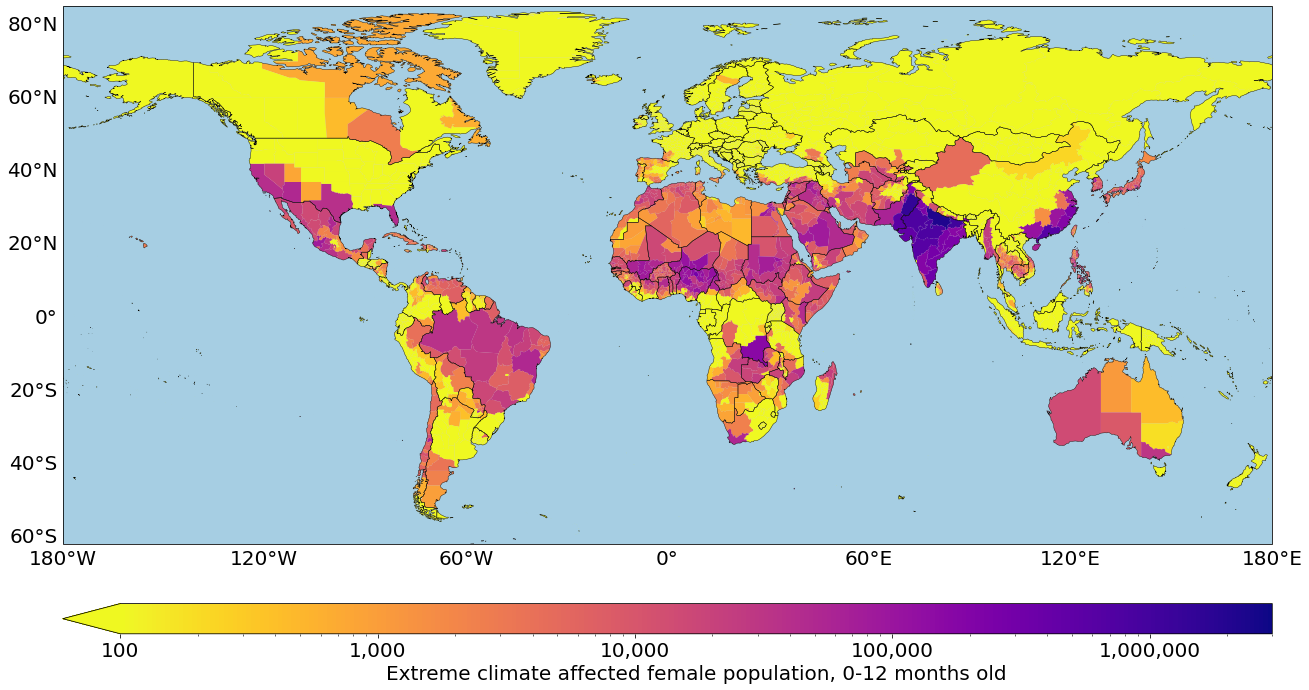

/opt/homebrew/Caskroom/miniforge/base/envs/xarray/lib/python3.12/site-packages/holoviews/plotting/mpl/element.py:1004: RuntimeWarning: All-NaN slice encountered
  el_min, el_max = np.nanmin(values), np.nanmax(values)


:Overlay
   .Polygons.I   :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II  :Polygons   [Longitude,Latitude]   (Extreme climate affected female population, 0-5 years old)
   .Polygons.III :Polygons   [Longitude,Latitude]   (nan)
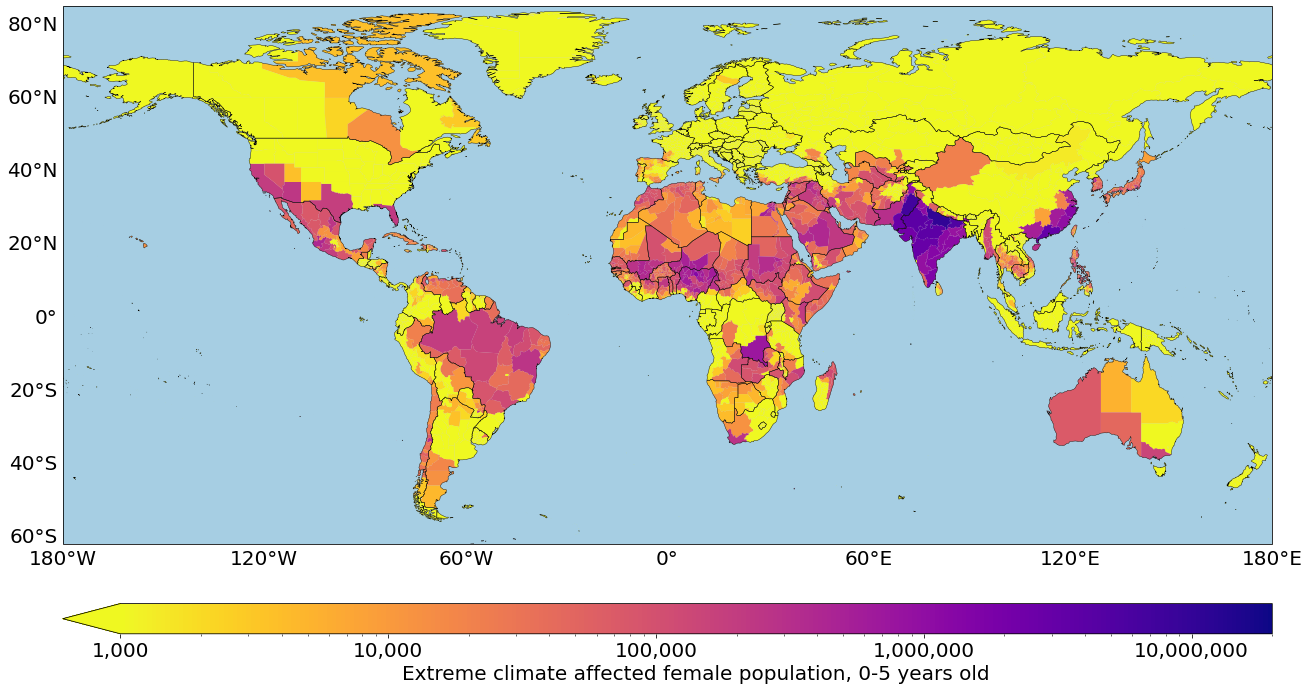

/opt/homebrew/Caskroom/miniforge/base/envs/xarray/lib/python3.12/site-packages/holoviews/plotting/mpl/element.py:1004: RuntimeWarning: All-NaN slice encountered
  el_min, el_max = np.nanmin(values), np.nanmax(values)


:Overlay
   .Polygons.I   :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II  :Polygons   [Longitude,Latitude]   (Extreme climate affected female population, more than 65 years old)
   .Polygons.III :Polygons   [Longitude,Latitude]   (nan)
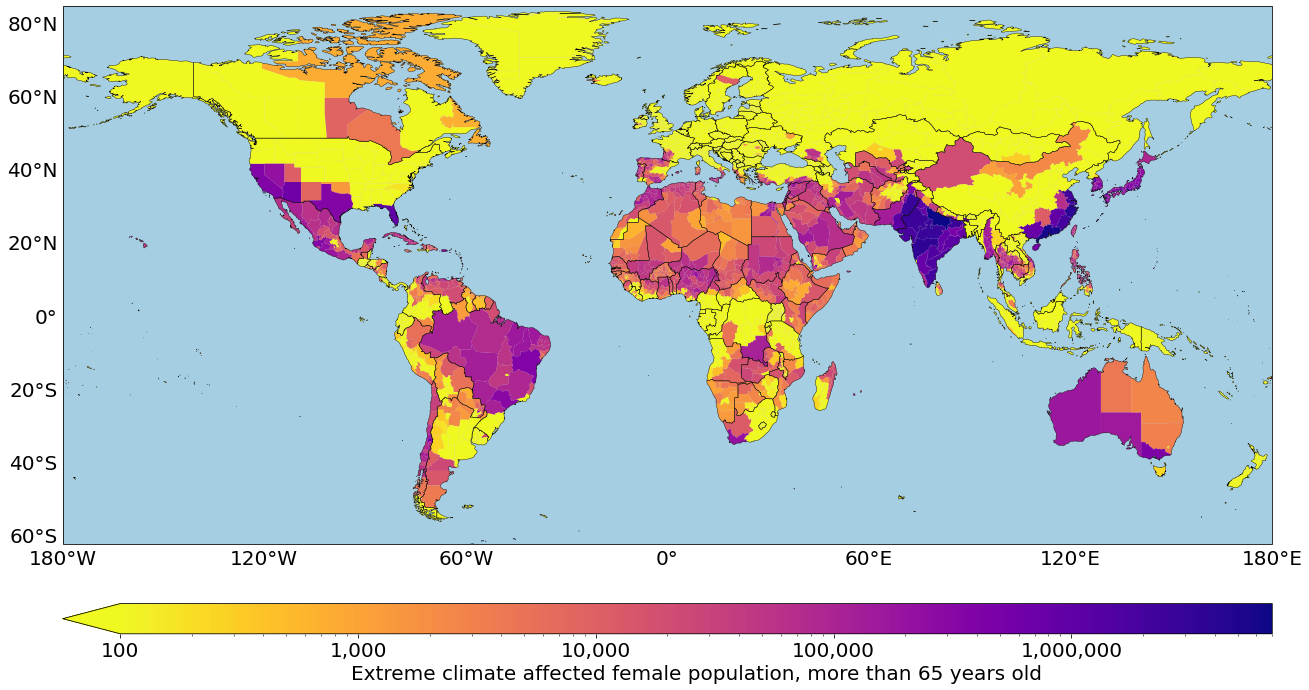

/opt/homebrew/Caskroom/miniforge/base/envs/xarray/lib/python3.12/site-packages/holoviews/plotting/mpl/element.py:1004: RuntimeWarning: All-NaN slice encountered
  el_min, el_max = np.nanmin(values), np.nanmax(values)


:Overlay
   .Polygons.I   :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II  :Polygons   [Longitude,Latitude]   (Extreme climate affected female population)
   .Polygons.III :Polygons   [Longitude,Latitude]   (nan)
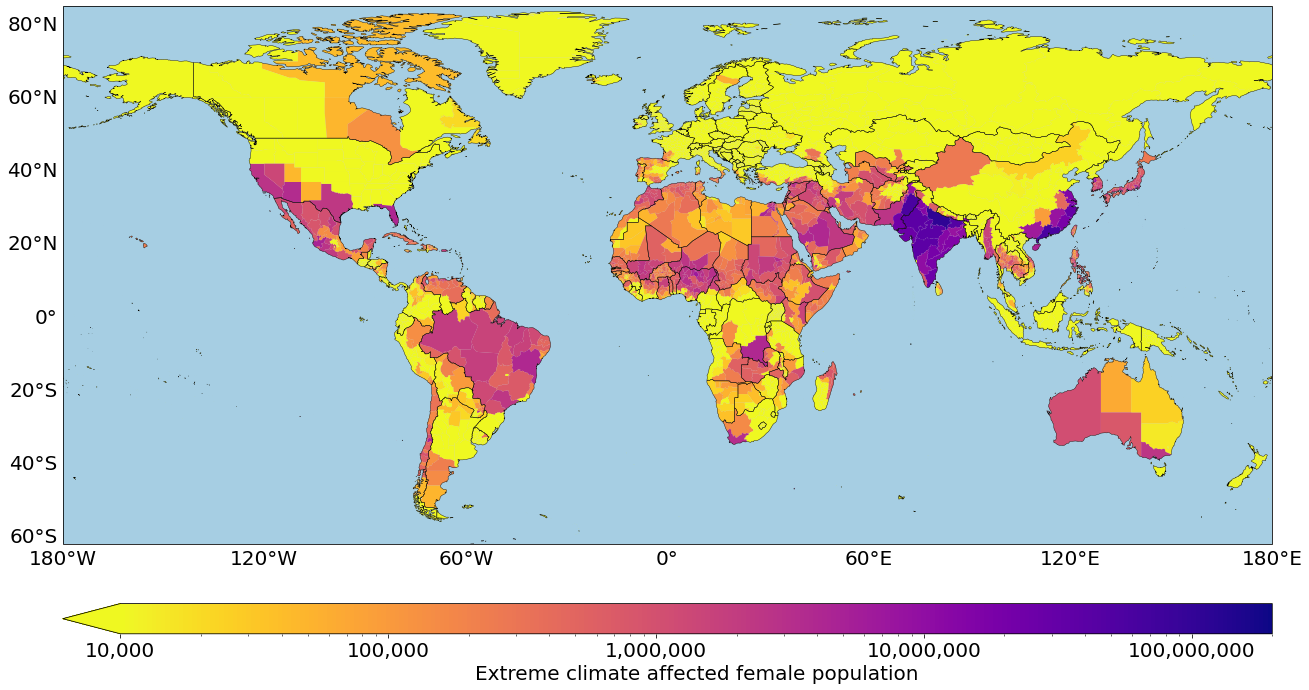

In [22]:
# Mapas de población

# Parámetros de visualización
options_s = { "colorbar": True, "linewidth": 0, "cmap": "plasma_r",
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180), "logz": True,
    "colorbar_opts": {"orientation": "horizontal", "format": "{x:,.0f}"} }
options_b = { "ylim":(-62,85), "xlim":(-180,180), "linewidth": 0.4 }

min = [100, 1000, 100, 10000]
max = [3e6, 2e7, 7e6, 2e8]

# Mapas
# Mujeres afectadas
n_series = "female"
# Iteramos para cada grupo demográfico
for i in range(len(perc_g[0])):
    vn = name_g[0][i]
    subn_m[vn] = df[vn].replace(0, 1)
    map_v = gv.Polygons( subn_m, vdims =
        gv.Dimension(vn, range = (min[i], max[i])) ).opts(**options_s)
    borders["nan"] = np.nan
    map_b = gv.Polygons( borders, vdims = "nan" 
        ).opts( cmap = "plasma_r", **options_b )
    map = ( ocean * map_v * map_b ).opts( **options_m )
    gv.output( map, size = 600 )

min: 0.0, max: 100.0


/opt/homebrew/Caskroom/miniforge/base/envs/xarray/lib/python3.12/site-packages/holoviews/plotting/mpl/element.py:1004: RuntimeWarning: All-NaN slice encountered
  el_min, el_max = np.nanmin(values), np.nanmax(values)


:Overlay
   .Polygons.I   :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II  :Polygons   [Longitude,Latitude]   (% Extreme climate affected female population, 0-12 months old)
   .Polygons.III :Polygons   [Longitude,Latitude]   (nan)
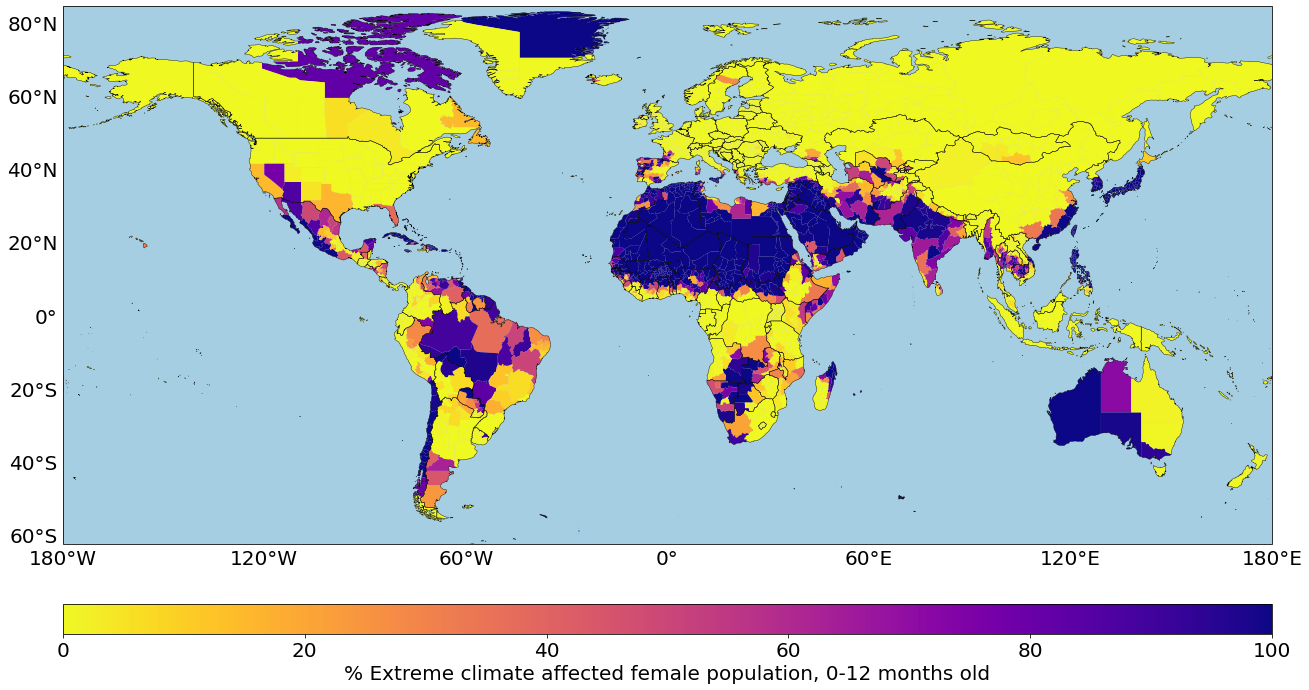

min: 0.0, max: 100.0


/opt/homebrew/Caskroom/miniforge/base/envs/xarray/lib/python3.12/site-packages/holoviews/plotting/mpl/element.py:1004: RuntimeWarning: All-NaN slice encountered
  el_min, el_max = np.nanmin(values), np.nanmax(values)


:Overlay
   .Polygons.I   :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II  :Polygons   [Longitude,Latitude]   (% Extreme climate affected female population, 0-5 years old)
   .Polygons.III :Polygons   [Longitude,Latitude]   (nan)
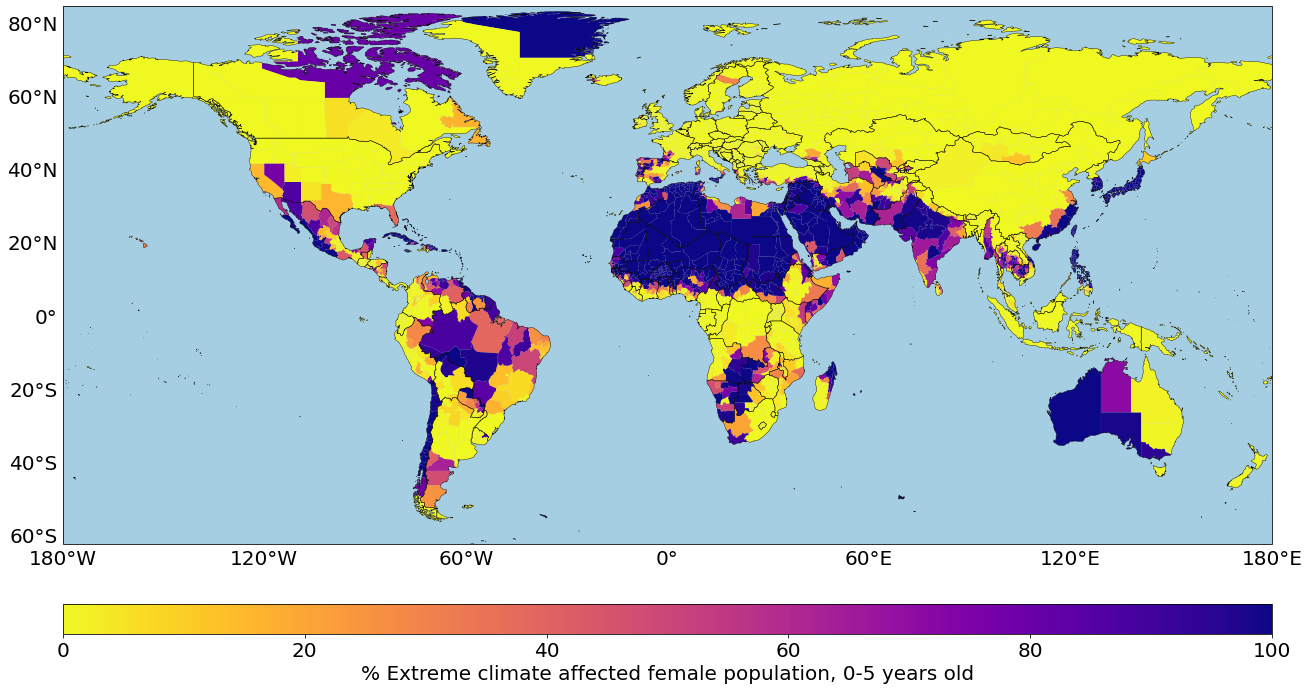

min: 0.0, max: 100.0


/opt/homebrew/Caskroom/miniforge/base/envs/xarray/lib/python3.12/site-packages/holoviews/plotting/mpl/element.py:1004: RuntimeWarning: All-NaN slice encountered
  el_min, el_max = np.nanmin(values), np.nanmax(values)


:Overlay
   .Polygons.I   :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II  :Polygons   [Longitude,Latitude]   (% Extreme climate affected female population, more than 65 years old)
   .Polygons.III :Polygons   [Longitude,Latitude]   (nan)
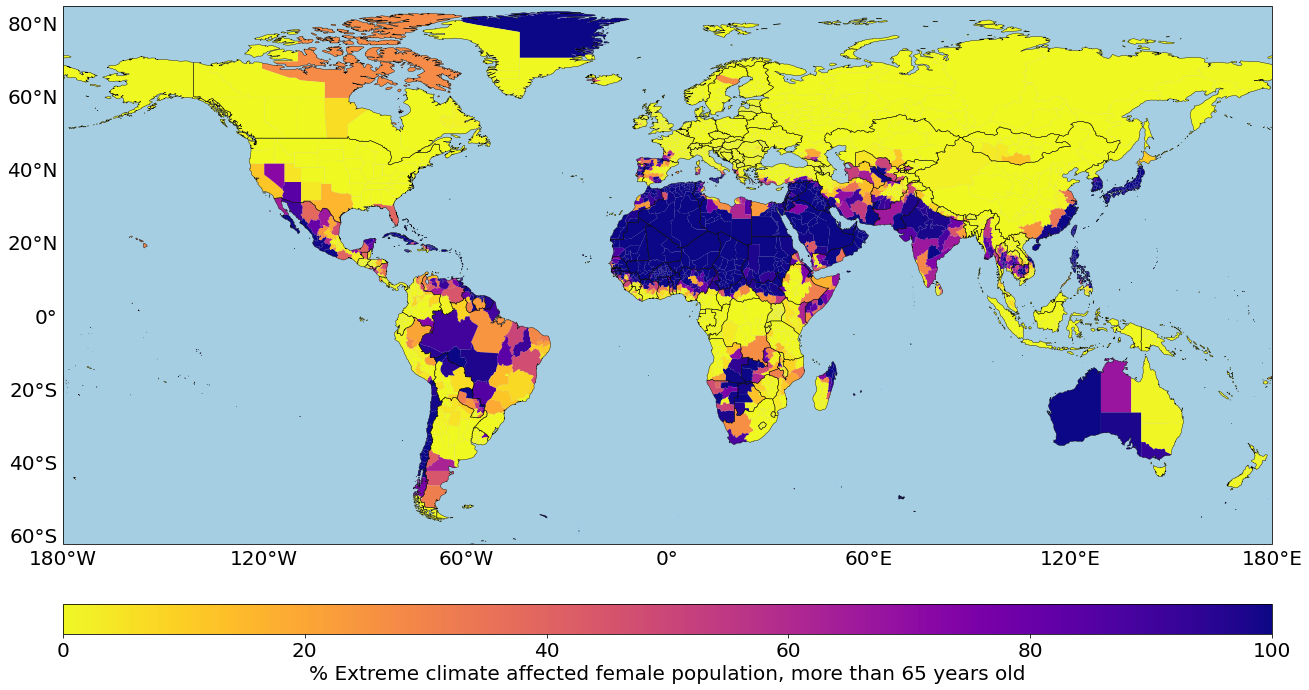

min: 0.0, max: 100.0


/opt/homebrew/Caskroom/miniforge/base/envs/xarray/lib/python3.12/site-packages/holoviews/plotting/mpl/element.py:1004: RuntimeWarning: All-NaN slice encountered
  el_min, el_max = np.nanmin(values), np.nanmax(values)
/opt/homebrew/Caskroom/miniforge/base/envs/xarray/lib/python3.12/site-packages/holoviews/plotting/mpl/element.py:1004: RuntimeWarning: All-NaN slice encountered
  el_min, el_max = np.nanmin(values), np.nanmax(values)
/opt/homebrew/Caskroom/miniforge/base/envs/xarray/lib/python3.12/site-packages/holoviews/plotting/mpl/element.py:1004: RuntimeWarning: All-NaN slice encountered
  el_min, el_max = np.nanmin(values), np.nanmax(values)


:Overlay
   .Polygons.I   :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II  :Polygons   [Longitude,Latitude]   (% Extreme climate affected female population)
   .Polygons.III :Polygons   [Longitude,Latitude]   (nan)
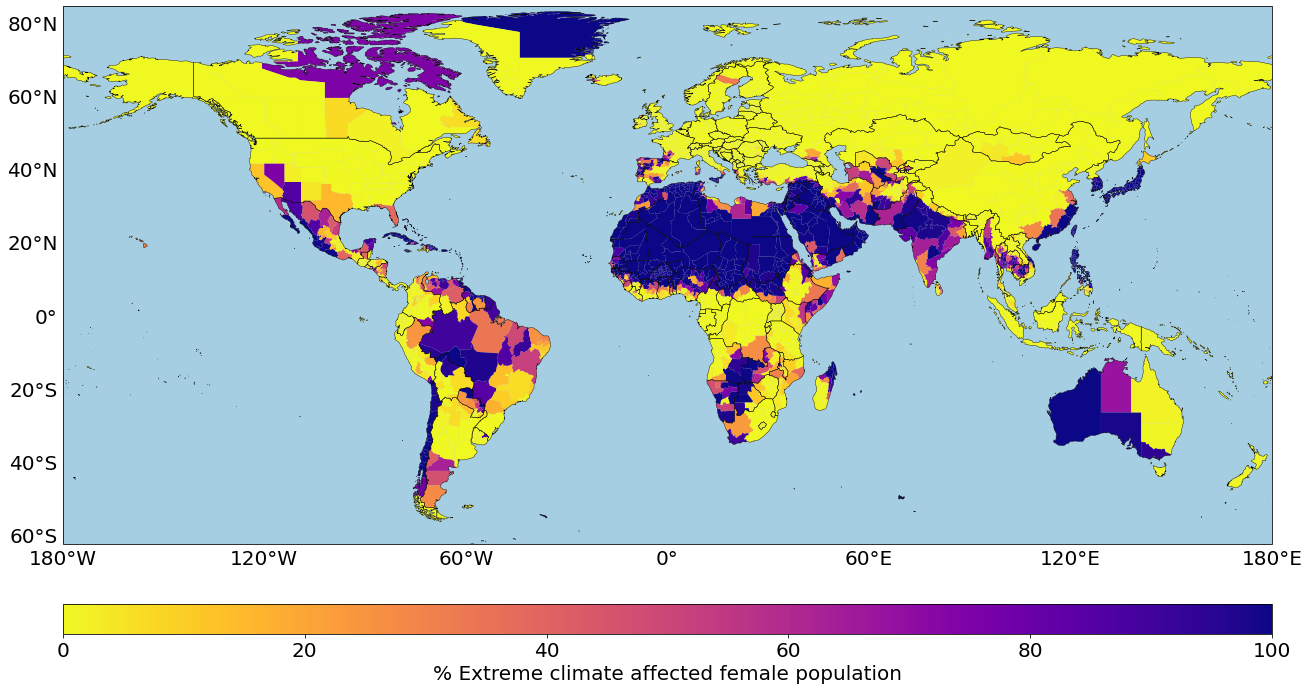

In [23]:
# Mapas de población

# Parámetros de visualización
options_s = { "colorbar": True, "linewidth": 0,
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar_opts": {"orientation": "horizontal"} }
options_s_2 = { "colorbar": True, "linewidth": 0,
    "hooks": [hook_2], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar_opts": {"orientation": "horizontal"} }
options_b = { "ylim":(-62,85), "xlim":(-180,180), "linewidth": 0.4 }
options_b_2 = { "ylim":(-62,85), "xlim":(-180,180), "linewidth": 0.1 }

# Mapas
# Mujeres afectadas
n_series = "female"
# Iteramos para cada grupos demográfico
for i in range(len(perc_g[0])):
    vn = perc_g[0][i]
    subn_m[vn] = df[vn]
    subn_m[vn] = subn_m[vn].where(subn_m[vn] < 100, 100)
    print(f"min: {subn_m[vn].min()}, max: {subn_m[vn].max()}")
    min = 0
    max = 100
    borders["nan"] = np.nan
    # Guardamos el archivo
    if i == len(perc_g[0]) - 1:
        map_v = gv.Polygons( subn_m, vdims =
            gv.Dimension(vn, range = (min, max) )
            ).opts( cmap = "plasma_r", **options_s_2 )
        map_b = gv.Polygons( borders, vdims = "nan" 
            ).opts( cmap = "plasma_r", **options_b_2 )
        map = ( ocean * map_v * map_b ).opts( **options_m_2 )
        hv.render(map).savefig( "../graphs/perc_women_subnational.pdf",
            bbox_inches = "tight" )
    # Graficamos
    map_v = gv.Polygons( subn_m, vdims = gv.Dimension(vn, range = (min, max) )
        ).opts( cmap = "plasma_r", **options_s )
    map_b = gv.Polygons( borders, vdims = "nan" 
        ).opts( cmap = "plasma_r", **options_b )
    map = ( ocean * map_v * map_b ).opts( **options_m )
    gv.output( map, size = 600 )